# MARKET BASKET ANALYSIS


## OBJECTIVE
Association Rule Mining is a data mining technique that discovers interesting relationships, patterns, or associations within large datasets. It aims to identify rules that describe how certain items or events tend to co-occur. One of the most common applications of association rule mining is in the analysis of transactional data

The primary goal of Association Rule Mining is to reveal hidden patterns in the data, enabling businesses and researchers to gain insights into the relationships between different variables. The classic example is market basket analysis which is a crucial aspect of data science in retail and e-commerce, and the goal of this project is to discover which Items are frequently purchased together.


## TOOLS USED

* Data Analysis Tool (Python: using Libries such Pandas)
* Data Visualisation such Matplotlib
* Scikit-Learn
* Jupyter Notebook
* APRIORI ALGORITHM

## Data Preparation

1. Exploratory Data Analysis (EDA)
2. Market Basket Analysis
3. Visualization
4. Interpretation and Insights
5. Recommendations
6. Presentation

Deliverables include:•
* A well-documented Jupyter Notebook or  report containing code  and explanations.
* Visualizations that support my findings..
* A GitHub repository with documentation and code.



In [115]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')




In [116]:
# Import the Operating System

import os 
path= "/Users\BUNMI\Documents\Flit Project 1"
os.chdir(path)
os.getcwd()



'c:\\Users\\BUNMI\\Documents\\Flit Project 1'

## DATA PREPARATION

1. Loading data from source-Desktop
2. Viewing Top 10 Data 
3. Checking Total number of Row& Column,Datatypes
4. checking missing Value

In [117]:
# LOAD DATASET USING PANDAS
data= pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")


#checking at the first few rows of the dataset to get a sense of its structure
data.head(10)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


#### UNDERSTANDING THE DATA

In [118]:
# what's the size of the dataset
data_size = data.shape

print(f'This dataset contain {data_size} rows and column respectively')

This dataset contain (38765, 3) rows and column respectively


In [119]:
# provide Additional Information of the dataset showing datatype of each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [120]:
# Identify missing values in the dataset.
# missing_value = data.isnull().sum()

# if missing_value == 0:
#     print('There is no missing value')
    

## DATA PREPROCESSING

This involves Cleaning and preprocessing the data. Remove duplicates, handle missing values, and transform the data into a suitable format for analysis

1. This Date was converted from Object to Date Timestamp
2. The 759 was drop from the Dataset 
3. No Null value in the Dataset


In [121]:
data.duplicated().value_counts()

False    38006
True       759
dtype: int64

In [122]:
# Checking for the Total duplicate Values
duplicate = data.duplicated().sum()

# Display the result
print(f'Total duplicate value is: {duplicate}')

Total duplicate value is: 759


In [123]:
# Removing Duplicate value which is 759 to ensure the data is properly clean
Clean_data = data.drop_duplicates()

# Check the count of the Clean Data
Clean_data.shape

(38006, 3)

In [124]:
#  Converting Date Column From Object Data to Time stamp
Clean_data['Date'] = pd.to_datetime(Clean_data['Date'])

# Check for the types of variables (numeric, categorical, etc.)
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB


In [125]:
# Getting basic statistics for the variable- Member Number (mean, median, standard deviation, etc.).

Clean_data['Member_number'].describe()

count    38006.000000
mean      3003.361390
std       1153.659151
min       1000.000000
25%       2001.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64

## EXPLORATORY DATA ANALYSIS

In [126]:
# Get the number of unique Items contained in the dataset
unique_item = data['itemDescription'].nunique()

print(f'This dataset contains {unique_item} unique items')

This dataset contains 167 unique items


In [127]:
#  Total Number of Unique customers contained in the dataset
No_unique_id = data['Member_number'].nunique()

print(f'This dataset contains {No_unique_id} unique Id')

This dataset contains 3898 unique Id


In [128]:
#  Items and Number of each Items sold per Each day
items_sold_Eachday = Clean_data.groupby('Date')['itemDescription'].value_counts()

# Display the result
print(f'Items Bought for Each day: {items_sold_Eachday}')



Items Bought for Each day: Date        itemDescription   
2014-01-01  bottled water         4
            yogurt                4
            frozen vegetables     3
            hamburger meat        3
            other vegetables      3
                                 ..
2015-12-30  rubbing alcohol       1
            sausage               1
            tropical fruit        1
            turkey                1
            whipped/sour cream    1
Name: itemDescription, Length: 25231, dtype: int64


In [129]:
# The Item most purchase in the data
item_count= data['itemDescription'].value_counts()

# print out each Item with the Amount bought
print(item_count)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


In [130]:
# Aggregations TItems Bought by  Each member  and Date Each Item was Bought.
group_member = Clean_data.groupby(['Member_number','itemDescription','Date']).count()

group_member.head(10)

Empty DataFrame
Columns: []
Index: [(1000, canned beer, 2015-07-24 00:00:00), (1000, hygiene articles, 2015-11-25 00:00:00), (1000, misc. beverages, 2015-07-24 00:00:00), (1000, pastry, 2014-06-24 00:00:00), (1000, pickled vegetables, 2015-05-27 00:00:00), (1000, salty snack, 2014-06-24 00:00:00), (1000, sausage, 2015-03-15 00:00:00), (1000, sausage, 2015-11-25 00:00:00), (1000, semi-finished bread, 2015-03-15 00:00:00), (1000, soda, 2015-05-27 00:00:00)]

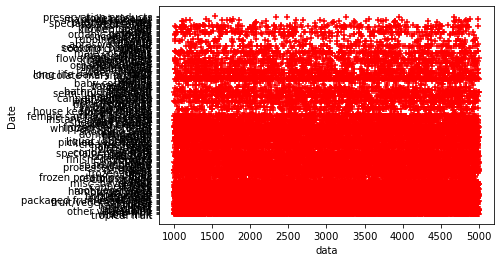

In [131]:
# plot a scatter plot to get the idea on distribution of the data point
%matplotlib inline
from matplotlib import markers

plt.xlabel('data')
plt.ylabel('Date')
plt.scatter(Clean_data['Member_number'],Clean_data['itemDescription'],color='red', marker='+')

In [132]:
group_member2 = Clean_data.groupby(['Member_number','itemDescription']).sum()

group_member2

Empty DataFrame
Columns: []
Index: [(1000, canned beer), (1000, hygiene articles), (1000, misc. beverages), (1000, pastry), (1000, pickled vegetables), (1000, salty snack), (1000, sausage), (1000, semi-finished bread), (1000, soda), (1000, whole milk), (1000, yogurt), (1001, beef), (1001, curd), (1001, frankfurter), (1001, rolls/buns), (1001, sausage), (1001, soda), (1001, whipped/sour cream), (1001, white bread), (1001, whole milk), (1002, butter), (1002, butter milk), (1002, frozen vegetables), (1002, other vegetables), (1002, specialty chocolate), (1002, sugar), (1002, tropical fruit), (1002, whole milk), (1003, dental care), (1003, detergent), (1003, frozen meals), (1003, rolls/buns), (1003, root vegetables), (1003, sausage), (1004, canned beer), (1004, chocolate), (1004, cling film/bags), (1004, dish cleaner), (1004, frozen fish), (1004, hygiene articles), (1004, other vegetables), (1004, packaged fruit/vegetables), (1004, pastry), (1004, pip fruit), (1004, red/blush wine), (1004, rolls/buns), (1004, root vegetables), (1004, shopping bags), (1004, tropical fruit), (1004, whole milk), (1005, margarine), (1005, rolls/buns), (1005, whipped/sour cream), (1006, bottled beer), (1006, bottled water), (1006, chicken), (1006, chocolate), (1006, flour), (1006, frankfurter), (1006, rice), (1006, rolls/buns), (1006, shopping bags), (1006, skin care), (1006, softener), (1006, whole milk), (1008, dessert), (1008, domestic eggs), (1008, hamburger meat), (1008, liquor (appetizer)), (1008, liver loaf), (1008, photo/film), (1008, root vegetables), (1008, soda), (1008, tropical fruit), (1008, white wine), (1008, yogurt), (1009, canned fish), (1009, cocoa drinks), (1009, herbs), (1009, ketchup), (1009, newspapers), (1009, pastry), (1009, tropical fruit), (1009, yogurt), (1010, UHT-milk), (1010, bottled water), (1010, candles), (1010, coffee), (1010, frankfurter), (1010, kitchen towels), (1010, pip fruit), (1010, rolls/buns), (1010, sliced cheese), (1010, specialty bar), (1011, bottled water), (1011, candles), (1011, candy), (1011, citrus fruit), (1011, curd cheese), (1011, frankfurter), ...]

[34766 rows x 0 columns]

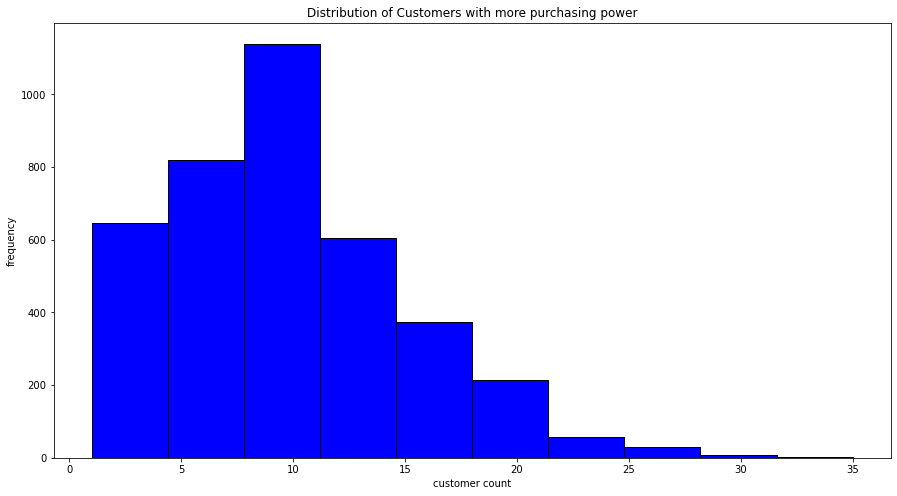

In [133]:

# Plotting the histogram to check summary of the frequency distribution of the member number in a single column
plt.figure(figsize =(15,8))
# Plotting the histogram
plt.hist(Clean_data['Member_number'].value_counts(),bins =10, color ='blue',edgecolor ='black')

# Adding labels and title
plt.xlabel('customer count')
plt.ylabel('frequency')
plt.title('Distribution of Customers with more purchasing power')

#  Display the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


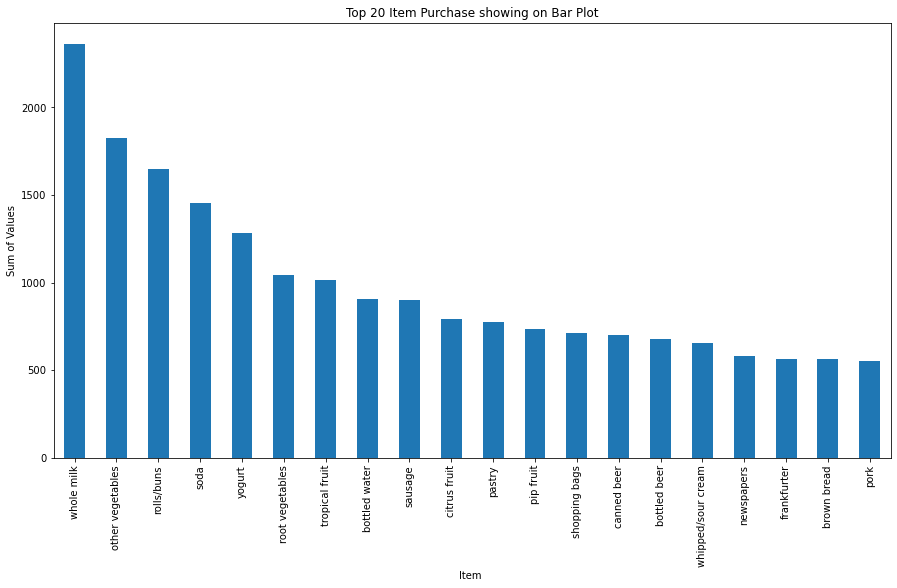

In [134]:
# Grouping by a specific column and calculating the sum of another column
group_items = Clean_data.groupby('itemDescription')

# Sorting the groups based on the size of values in descending order,Selecting the top 20 groups
sizeitem = group_items.size().sort_values(ascending = False).head(20).plot.bar(figsize=(15,8))

print(sizeitem)

# Adding labels and title
plt.xlabel('Item ')
plt.ylabel('Sum of Values')
plt.title('Top 20 Item Purchase showing on Bar Plot')

# Display the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


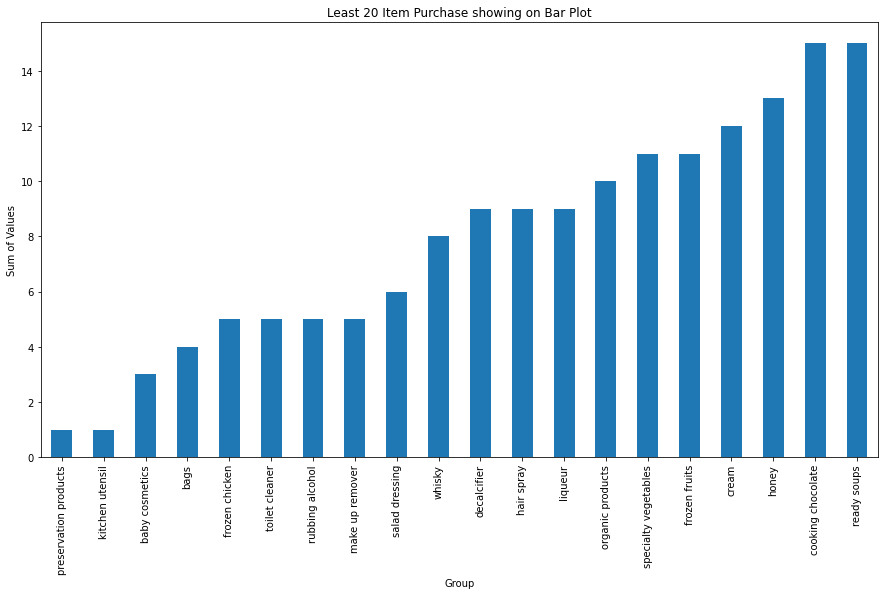

In [135]:
# Grouping by a specific column and calculating the sum of another column
group_items = Clean_data.groupby('itemDescription')

# Sorting the groups based on the size of values in descending order,Selecting the top 20 groups
Leastitem = group_items.size().sort_values(ascending = True).head(20).plot.bar(figsize=(15,8))

print(Leastitem)

# Adding labels and title
Leastitem.plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Sum of Values')
plt.title('Least 20 Item Purchase showing on Bar Plot')

# Display the plot
plt.show()

<AxesSubplot:xlabel='itemDescription', ylabel='Count'>

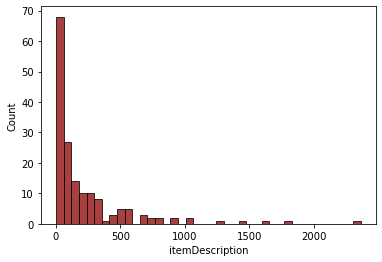

In [136]:
#For numeric variables, create histograms, box plots, and summary statistics.
(sns.histplot(Clean_data['itemDescription'].value_counts(),kde =False,color = 'darkred',bins = 40))

In [137]:
#Let's visualize the columns by plotting the charts
# plt.figure(figsize =(20, 15))
# sns.countplot(x = 'itemDescription',hue='Member_number' ,data = Clean_data, palette = 'Blues_r')

PERFORMING TRANSACTIONAL ENCODING


Transaction encoding is the process of converting transactional data into a binary matrix format where rows represent transactions and columns represent unique items.
Each cell in the matrix indicates whether a particular item was present (1) or absent (0) in a transaction. 

In [138]:
#print(f'see the transactional coding for each member {Basket}')
#  Grouping the DataFrame by 'Member_number' and 'itemDescription',size method is applied to count the occurrences of each item in each transaction,unstack method  was use to pivot the data, creating a matrix,fillna(0) method fills the missing values with zeros.

Basket = Clean_data.groupby(['Member_number','itemDescription']).size().unstack().fillna(0)

## Transaction Encoding by using applymap method to convert counts to binary values (1 if the item was present, 0 otherwise). 
Basket= Basket.applymap(lambda x: 1 if x > 0 else 0)


# Display the encoded transactions
print(Basket)

itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1000                                 0         0                 0   
1001                                 0         0                 0   
1002                                 0         0                 0   
1003                                 0         0                 0   
1004                                 0         0                 0   
...                                ...       ...               ...   
4996                                 0         0                 0   
4997                                 0         0                 0   
4998                                 0         0                 0   
4999                                 0         0                 0   
5000                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number  

In [139]:
plt.figure(figsize=(13,7))
sns.heatmap(Basket,annot=True)

## USE APRIORI ALGORITHM

The Apriori algorithm is a commonly used algorithm for association rule mining. It uses a breadth-first search strategy to discover frequent itemsets and generate association rules efficiently.

In [ ]:
# Import the required libraries
from mlxtend.frequent_patterns import apriori,association_rules

# Apply the Apriori algorithm to find fr equent itemsets.(min_support represents the minimum support threshold for an itemset to be considered frequent)
frequent_item = apriori(Basket,min_support = 0.02, use_colnames=True)

#Generate association rules based on the frequent itemsets.
rules = association_rules(frequent_item,metric="lift",min_threshold=1)

print(rules)

c:\Users\BUNMI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                   antecedents                       consequents  \
0              (bottled water)                        (UHT-milk)   
1                   (UHT-milk)                   (bottled water)   
2           (other vegetables)                        (UHT-milk)   
3                   (UHT-milk)                (other vegetables)   
4                 (rolls/buns)                        (UHT-milk)   
...                        ...                               ...   
2951  (rolls/buns, whole milk)                    (yogurt, soda)   
2952                    (soda)  (yogurt, rolls/buns, whole milk)   
2953                  (yogurt)    (whole milk, rolls/buns, soda)   
2954              (rolls/buns)        (whole milk, yogurt, soda)   
2955              (whole milk)        (yogurt, rolls/buns, soda)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.213699            0.078502  0.021293    0.099640  1.269268   
1               0.07850